In [12]:
import pandas as pd
from cmdstanpy import CmdStanModel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv('heart.csv').dropna()

data_model1 = data[['age', 'trestbps', 'thalach']]
data_model1_dict = {
    'N': len(data_model1),
    'age': data_model1['age'].values,
    'trestbps': data_model1['trestbps'].values,
    'thalach': data_model1['thalach'].values,
    'y': data['target'].values
}

data_model2 = data[['age', 'trestbps', 'thalach', 'chol', 'oldpeak']]
data_model2_dict = {
    'N': len(data_model2),
    'age': data_model2['age'].values,
    'trestbps': data_model2['trestbps'].values,
    'thalach': data_model2['thalach'].values,
    'chol': data_model2['chol'].values,
    'oldpeak': data_model2['oldpeak'].values,
    'y': data['target'].values
}


In [3]:
model1 = CmdStanModel(stan_file='posterior_analysis1.stan')
fit1 = model1.sample(data=data_model1_dict, iter_sampling=1000, iter_warmup=500, chains=4)

model2 = CmdStanModel(stan_file='posterior_analysis2.stan')
fit2 = model2.sample(data=data_model2_dict, iter_sampling=1000, iter_warmup=500, chains=4)


INFO:cmdstanpy:compiling stan file /home/data-analytics/posterior_analysis1.stan to exe file /home/data-analytics/posterior_analysis1
INFO:cmdstanpy:compiled model executable: /home/data-analytics/posterior_analysis1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/data-analytics/posterior_analysis1.hpp /home/data-analytics/posterior_analysis1.stan
Warning in '/home/data-analytics/posterior_analysis1.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:compiling stan file /home/data-analytics/posterior_analysis2.stan to exe file /home/data-analytics/posterior_analysis2
INFO:cmdstanpy:compiled model executable: /home/data-analytics/posterior_analysis2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/data-analytics/posterior_analysis2.hpp /home/data-analytics/posterior_analysis2.stan
Warning in '/home/data-analytics/posterior_analysis2.stan', line 8, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/


INFO:cmdstanpy:CmdStan done processing.


/tmp/ipykernel_7270/1634375506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model1['y_prob'] = predictions1
/tmp/ipykernel_7270/1634375506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model2['y_prob'] = predictions2


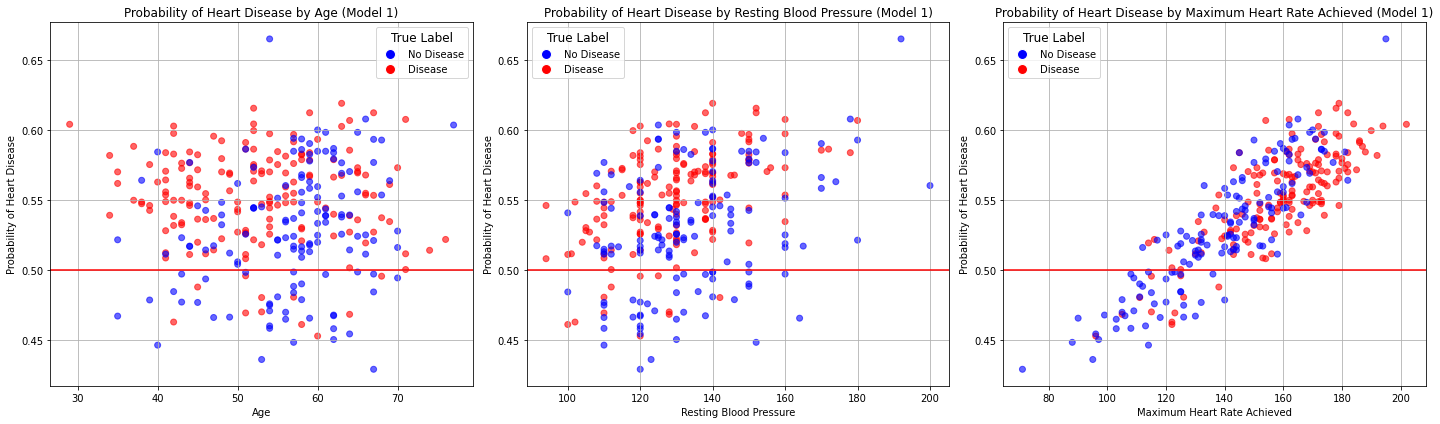

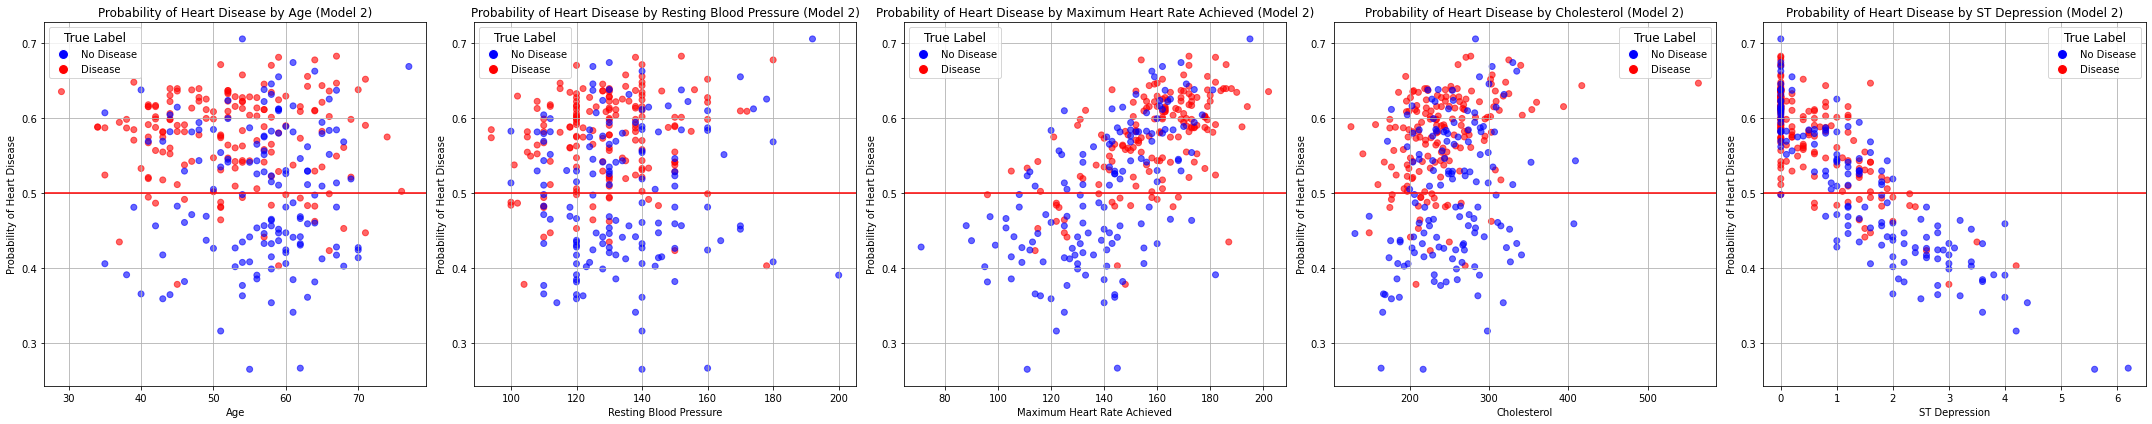

In [18]:
import matplotlib.pyplot as plt
import numpy as np

true_labels = data['target'].values

predictions1 = fit1.stan_variable('y_pred').mean(axis=0)
predictions2 = fit2.stan_variable('y_pred').mean(axis=0)

data_model1['y_prob'] = predictions1
data_model2['y_prob'] = predictions2

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Age vs Probability of Heart Disease
x_age = data_model1['age']
y_prob = data_model1['y_prob']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 1)')
axs[0].grid(True)
axs[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model1['trestbps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 1)')
axs[1].grid(True)
axs[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model1['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 1)')
axs[2].grid(True)
axs[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(30, 6))

# Age vs Probability of Heart Disease
x_age = data_model2['age']
y_prob = data_model2['y_prob']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 2)')
axs[0].grid(True)
axs[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model2['trestbps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 2)')
axs[1].grid(True)
axs[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model2['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 2)')
axs[2].grid(True)
axs[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Cholesterol vs Probability of Heart Disease
x_chol = data_model2['chol']
scatter = axs[3].scatter(x_chol, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
axs[3].set_xlabel('Cholesterol')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol (Model 2)')
axs[3].grid(True)
axs[3].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# ST Depression vs Probability of Heart Disease
x_oldpeak = data_model2['oldpeak']
scatter = axs[4].scatter(x_oldpeak, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
axs[4].set_xlabel('ST Depression')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST Depression (Model 2)')
axs[4].grid(True)
axs[4].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()


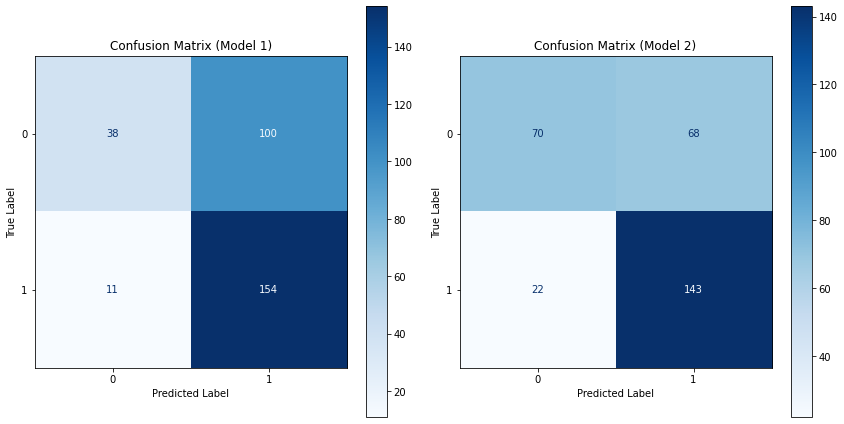

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions1 = fit1.stan_variable('y_pred').mean(axis=0)
predictions2 = fit2.stan_variable('y_pred').mean(axis=0)

threshold = 0.5
pred_labels1 = (predictions1 > threshold).astype(int)
pred_labels2 = (predictions2 > threshold).astype(int)

cm1 = confusion_matrix(data['target'], pred_labels1)
cm2 = confusion_matrix(data['target'], pred_labels2)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for Model 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1])
disp1.plot(ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix (Model 1)')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# Confusion matrix for Model 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
disp2.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Model 2)')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import accuracy_score

# Extract the predictions from the Stan models
predictions1 = fit1.stan_variable('y_pred').mean(axis=0)
predictions2 = fit2.stan_variable('y_pred').mean(axis=0)

# Assuming the threshold for classification is 0.5
threshold = 0.5
pred_labels1 = (predictions1 > threshold).astype(int)
pred_labels2 = (predictions2 > threshold).astype(int)

# Calculate accuracy for both models
accuracy1 = accuracy_score(data['target'], pred_labels1)
accuracy2 = accuracy_score(data['target'], pred_labels2)

print(f"Accuracy for Model 1: {accuracy1:.4f}")
print(f"Accuracy for Model 2: {accuracy2:.4f}")


Accuracy for Model 1: 0.6337
Accuracy for Model 2: 0.7030
